## Observations and Insights 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(249)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
244,g288,Capomulin,Male,3,19,45,37.074024,1
245,i334,Ramicane,Female,8,20,0,45.000000,0
246,i334,Ramicane,Female,8,20,5,41.020518,0
247,i334,Ramicane,Female,8,20,10,41.631247,0


In [74]:
# Checking the number of mice.
# Checking the number of mice.
total_mice = len(pd.unique(merge_df["Mouse ID"]))
total_mice_df = pd.DataFrame({
    "Number of Mice":[total_mice]})
total_mice_df


,Number of Mice
0,249


In [75]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint and show 
# all data for that ID

merge_df[["Mouse ID","Timepoint"]]
duplicate_rows = merge_df[merge_df.duplicated()]
duplicate_rows.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [76]:
# Optional: Get all the data for the duplicate mouse ID. 



In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get names of indexes for which column Mouse ID has value g989
mice_index = merge_df[merge_df["Mouse ID"]=="g989"].index
merge_df.drop(mice_index, inplace=True)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [78]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len(pd.unique(merge_df["Mouse ID"]))
total_mice_df_clean = pd.DataFrame({
    "Number of Mice Clean":[total_mice_clean]})
total_mice_df_clean


,Number of Mice Clean
0,248


## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_mean = merge_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = merge_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = merge_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = merge_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_SEM = merge_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

regime_overview = pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median, "Variance":tumor_variance, "Std Dev":tumor_std, "SEM":tumor_SEM})
regime_overview




,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [106]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_meas = merge_df.groupby("Drug Regimen").count()["Mouse ID"]
# total_meas_df = pd.DataFrame({"Total Measures":total_meas})
# total_meas_df
# total_measure_df = pd.DataFrame(total_meas_df,columns=['Drug Regimen','Total Measures'])
# merge_df.plot(x ="Drug Regimen",y = "Total Measures", kind = 'bar')
# plt.show()


,Total Measures
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<BarContainer object of 10 artists>

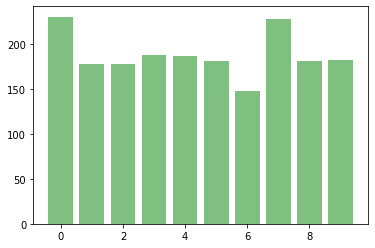

In [89]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_meas = merge_df.groupby("Drug Regimen").count()["Mouse ID"]
# total_measurements = pd.DataFrame({"Total Measurements":total_meas})
# total_measurements
total_measurements = [230,178,178,188,186,181,148,228,181,182]
x_axis = np.arange(len(total_measurements))
plt.bar(x_axis, total_measurements, color='g', alpha=.5, align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



([<matplotlib.patches.Wedge at 0x7fba2c1d6940>,
 [Text(-1.1994571897995099, -0.03608946990830798, 'Male'),
  Text(1.0995024239828841, 0.033082014082615026, 'Female')],
 [Text(-0.6996833607163808, -0.02105219077984632, '51.0%'),
  Text(0.5997285948997549, 0.018044734954153648, '49.0%')])

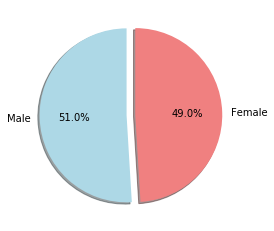

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_dist = merge_df.groupby("Sex").count()["Tumor Volume (mm3)"]
# print(gender_dist)
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["lightblue", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
